# Исследовательский проект 
# "Детерминанты выбора вредных привычек в России"
### Выполнила Книс Надежда

# Обработка и описание данных

Импорт необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np

#для графиков
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split

#для модели линейной регрессии
import statsmodels.api as sm

#для модели классификационного дерева
from sklearn.tree import (DecisionTreeClassifier,
                          plot_tree,
                          export_text)

#все метрики для подсчета качества моделей
from sklearn.metrics import (accuracy_score,
                            mean_squared_error)

In [160]:
df = pd.read_excel('Data2.xlsx')
#для запуска ячейки поместите файл с данными "data" в одну папку с данным блокнотом

In [67]:
df

,male,age,edu,walk_min,sport,smoke,smoke_cat,cigarettes,smoke_family,smoke_home,alcohol,labour_hours,income,income_cat,urban,married,children
0,0,22,0,180,0.0,1,1,20,1.0,1.0,1.0,NaN,NaN,3,1,0,1
1,0,22,0,200,1.0,1,1,20,0.0,1.0,1.0,NaN,40000.0,4,1,1,1
2,0,52,1,120,0.0,0,4,0,1.0,1.0,1.0,60.0,80000.0,4,1,0,0
3,0,15,0,120,1.0,0,4,0,0.0,0.0,NaN,NaN,NaN,4,1,0,0
4,0,32,2,0,0.0,1,1,10,0.0,1.0,1.0,40.0,70000.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0,58,1,60,1.0,0,4,0,1.0,1.0,0.0,NaN,20000.0,3,0,1,0
3878,1,24,1,120,1.0,0,3,0,1.0,0.0,1.0,47.0,14000.0,3,0,0,0
3879,0,61,0,30,0.0,0,4,0,1.0,1.0,1.0,NaN,12000.0,2,0,0,1
3880,0,25,2,20,1.0,0,4,0,0.0,0.0,1.0,40.0,30000.0,4,0,1,0


Мы хотим построить линейную регрессию, где зависимой переменной будет количество выкуриваемых сигарет в день. 
Посмотрим, сколько людей сколько курят сигарет.

In [164]:
df['cigarettes'].value_counts()

0      2835
20      357
10      252
15       87
5        44
30       44
997      37
40       31
12       29
25       21
8        21
7        20
6        19
3        18
4        12
2        12
999      10
1         4
60        4
13        4
14        3
18        3
16        3
17        2
11        2
9         2
21        1
28        1
35        1
50        1
22        1
45        1
Name: cigarettes, dtype: int64

Text(0, 0.5, 'number of respondents')

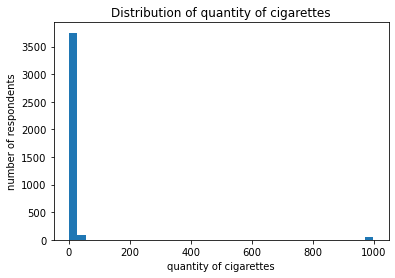

In [69]:
plt.hist(df['cigarettes'], bins = int(180/5))
plt.title('Distribution of quantity of cigarettes')
plt.xlabel('quantity of cigarettes')
plt.ylabel('number of respondents')

Мы видим, что большая часть выборки (около 75 процентов) - это некурящие люди, то есть количество выкуриваемых ими сигарет равно нулю.   
Это не очень хорошо, так как возникает очень сильный перевес данных к одному значению.  
Тогда, построим линейную регрессию для курящих людей: как количество выкуриваемых ими сигарет зависит от различных факторов.  
Однако также мы удалим выбросы (значения больше 900), потому что они очень сильно смещают распределение нашей выборки вправо.

In [165]:
#delete outliers
df1 = df[df['cigarettes']>0]
df1 = df1[df1['cigarettes']<900]

In [166]:
df1

,male,age,edu,walk_min,sport,smoke,smoke_cat,cigarettes,smoke_family,smoke_home,alcohol,labour_hours,income,income_cat,urban,married,children
0,0,22,0,180,0.0,1,1,20,1.0,1.0,1.0,NaN,NaN,3,1,0,1
1,0,22,0,200,1.0,1,1,20,0.0,1.0,1.0,NaN,40000.0,4,1,1,1
4,0,32,2,0,0.0,1,1,10,0.0,1.0,1.0,40.0,70000.0,4,1,0,0
7,1,36,0,120,1.0,1,1,10,1.0,1.0,1.0,60.0,NaN,4,1,1,0
8,1,25,1,200,0.0,1,1,17,1.0,1.0,1.0,70.0,35000.0,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,1,22,1,60,1.0,1,1,15,1.0,1.0,1.0,50.0,30000.0,4,1,0,0
3866,0,50,2,300,1.0,1,1,7,1.0,0.0,1.0,40.0,NaN,4,1,1,0
3869,1,49,1,400,0.0,1,1,20,1.0,0.0,1.0,40.0,NaN,3,0,1,1
3871,1,39,2,120,0.0,1,1,20,1.0,0.0,1.0,48.0,NaN,3,0,1,1


Необходимо удалить пропущенные значения перед построением регрессионной модели.  
Однако перед этим нужно:  
    1) Оставить только те столбцы, которые нужны для конкретно этой модели.  
    2) Убрать также те столбцы, в которых настолько много пропущенных значений, что при удалении пропущенных значений выборка значительно сократится. 
    Для этого мы посмотрим, сколько непропущенных значений осталось в столбцах. 

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 3875
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   male          1000 non-null   int64  
 1   age           1000 non-null   int64  
 2   edu           1000 non-null   int64  
 3   walk_min      1000 non-null   int64  
 4   sport         974 non-null    float64
 5   smoke         1000 non-null   int64  
 6   smoke_cat     1000 non-null   int64  
 7   cigarettes    1000 non-null   int64  
 8   smoke_family  960 non-null    float64
 9   smoke_home    992 non-null    float64
 10  alcohol       983 non-null    float64
 11  labour_hours  685 non-null    float64
 12  income        718 non-null    float64
 13  income_cat    1000 non-null   int64  
 14  urban         1000 non-null   int64  
 15  married       1000 non-null   int64  
 16  children      1000 non-null   int64  
dtypes: float64(6), int64(11)
memory usage: 140.6 KB


Среди "вредных" столбцов оказались labour_hours и income, значит их целиком надо удалить перед удалением пропущенных значений. 

Убираем ненужные и "вредные" столбцы. 

In [167]:
df1 = df1.drop(['smoke', 'smoke_cat', 'income_cat', 'labour_hours', 'income'], axis=1)
df1

,male,age,edu,walk_min,sport,cigarettes,smoke_family,smoke_home,alcohol,urban,married,children
0,0,22,0,180,0.0,20,1.0,1.0,1.0,1,0,1
1,0,22,0,200,1.0,20,0.0,1.0,1.0,1,1,1
4,0,32,2,0,0.0,10,0.0,1.0,1.0,1,0,0
7,1,36,0,120,1.0,10,1.0,1.0,1.0,1,1,0
8,1,25,1,200,0.0,17,1.0,1.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3865,1,22,1,60,1.0,15,1.0,1.0,1.0,1,0,0
3866,0,50,2,300,1.0,7,1.0,0.0,1.0,1,1,0
3869,1,49,1,400,0.0,20,1.0,0.0,1.0,0,1,1
3871,1,39,2,120,0.0,20,1.0,0.0,1.0,0,1,1


Теперь можем удалить пропущенные значения, чтобы строить регрессионную модель.

In [168]:
df1 = df1.dropna(axis=0)
df1

,male,age,edu,walk_min,sport,cigarettes,smoke_family,smoke_home,alcohol,urban,married,children
0,0,22,0,180,0.0,20,1.0,1.0,1.0,1,0,1
1,0,22,0,200,1.0,20,0.0,1.0,1.0,1,1,1
4,0,32,2,0,0.0,10,0.0,1.0,1.0,1,0,0
7,1,36,0,120,1.0,10,1.0,1.0,1.0,1,1,0
8,1,25,1,200,0.0,17,1.0,1.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3856,1,59,1,180,0.0,20,1.0,0.0,1.0,1,1,0
3865,1,22,1,60,1.0,15,1.0,1.0,1.0,1,0,0
3866,0,50,2,300,1.0,7,1.0,0.0,1.0,1,1,0
3869,1,49,1,400,0.0,20,1.0,0.0,1.0,0,1,1


Теперь можем посмотреть на распределение зависимой переменной

Text(0, 0.5, 'number of respondents')

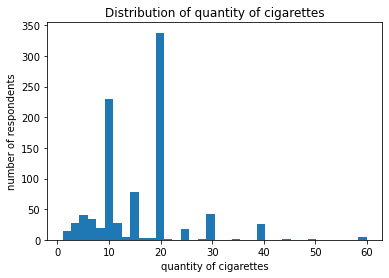

In [169]:
plt.hist(df1['cigarettes'], bins = int(180/5))
plt.title('Distribution of quantity of cigarettes')
plt.xlabel('quantity of cigarettes')
plt.ylabel('number of respondents')

In [170]:
df1['cigarettes'].value_counts()

20    338
10    230
15     78
30     42
5      40
12     26
40     26
7      19
8      18
25     18
3      16
6      15
4      12
2      11
60      4
1       4
13      3
18      3
14      2
11      2
9       2
16      2
21      1
17      1
28      1
35      1
50      1
22      1
45      1
Name: cigarettes, dtype: int64

Для дальнейшей ясной интерпретации мы создадим дамми-переменные для категориальной переменной edu, так как на данный момент там встречаются значения 0(есть только школьное образование), 1(помимо школьного образования - колледж), 2 (есть высшее образование).

In [171]:
df1 = pd.get_dummies(df1, columns = ['edu'], drop_first=True)
#dummy trap is when all categoricals are inclided withous leaving one as a basic
#so by drop_first we can avoid this

In [172]:
df1

,male,age,walk_min,sport,cigarettes,smoke_family,smoke_home,alcohol,urban,married,children,edu_1,edu_2
0,0,22,180,0.0,20,1.0,1.0,1.0,1,0,1,0,0
1,0,22,200,1.0,20,0.0,1.0,1.0,1,1,1,0,0
4,0,32,0,0.0,10,0.0,1.0,1.0,1,0,0,0,1
7,1,36,120,1.0,10,1.0,1.0,1.0,1,1,0,0,0
8,1,25,200,0.0,17,1.0,1.0,1.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,1,59,180,0.0,20,1.0,0.0,1.0,1,1,0,1,0
3865,1,22,60,1.0,15,1.0,1.0,1.0,1,0,0,1,0
3866,0,50,300,1.0,7,1.0,0.0,1.0,1,1,0,0,1
3869,1,49,400,0.0,20,1.0,0.0,1.0,0,1,1,1,0


Переименуем переменную edu1 в college, edu2 - в high_ed, так как за базовую категорию была взята категория с нулем, то есть образование - школьное.

In [173]:
df1 = df1.rename(columns={"edu_1": "college", "edu_2": "high_ed"})

In [174]:
df1

,male,age,walk_min,sport,cigarettes,smoke_family,smoke_home,alcohol,urban,married,children,college,high_ed
0,0,22,180,0.0,20,1.0,1.0,1.0,1,0,1,0,0
1,0,22,200,1.0,20,0.0,1.0,1.0,1,1,1,0,0
4,0,32,0,0.0,10,0.0,1.0,1.0,1,0,0,0,1
7,1,36,120,1.0,10,1.0,1.0,1.0,1,1,0,0,0
8,1,25,200,0.0,17,1.0,1.0,1.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,1,59,180,0.0,20,1.0,0.0,1.0,1,1,0,1,0
3865,1,22,60,1.0,15,1.0,1.0,1.0,1,0,0,1,0
3866,0,50,300,1.0,7,1.0,0.0,1.0,1,1,0,0,1
3869,1,49,400,0.0,20,1.0,0.0,1.0,0,1,1,1,0


Также приведем описательные статистики. 

In [175]:
df1.describe()

,male,age,walk_min,sport,cigarettes,smoke_family,smoke_home,alcohol,urban,married,children,college,high_ed
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.640523,38.903050,123.052288,0.224401,15.938998,0.748366,0.538126,0.831155,0.770153,0.537037,0.318083,0.473856,0.247277
std,0.480109,14.275005,130.071876,0.417415,8.475160,0.434189,0.498816,0.374819,0.420964,0.498898,0.465986,0.499588,0.431664
min,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,30.000000,0.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,37.000000,60.000000,0.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,180.000000,0.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,81.000000,840.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


В таблице вы можете увидеть среднее, стандартное отклонение, минимальное значение, квартили 1, 2 и 3 порядков, а также максимальное значение. 

Теперь построим корреляционную матрицу, чтобы посмотреть, с какими переменными коррелирует и в какой степени наша зависимая переменная сigarettes.

In [176]:
df1.corr().loc['cigarettes']

male            0.337383
age             0.156673
walk_min        0.020483
sport          -0.106791
cigarettes      1.000000
smoke_family    0.074357
smoke_home      0.125401
alcohol        -0.022813
urban          -0.084323
married         0.060113
children       -0.048650
college         0.038256
high_ed        -0.082018
Name: cigarettes, dtype: float64

Мы видим, что больше всего наша зависимая переменная коррелирует с полом (33%), возрастом (15%), курением в месте, где человек живет (12%), а также с кол-вом спорта в жизни человека (10%). Однако мы все равно включим все переменные в регрессионное уравнение. 

# Модель 1. Регрессионная модель

In [177]:
X = df1.drop('cigarettes', axis=1)
y = df1['cigarettes']

In [178]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

C:\Users\Honor\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cigarettes   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           2.00e-28
Time:                        20:20:54   Log-Likelihood:                -3182.2
No. Observations:                 918   AIC:                             6390.
Df Residuals:                     905   BIC:                             6453.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.8496      1.408      6.995      0.000       7.086      12.613
male             5.9297      0.559     10.611      0.000       4.833       7.026
age              0.0497      0.020      2.522      0.012       0.011       0.088
walk_min         0.0014      0.002      0.688      0.491      -0.003       0.005
sport           -1.6884      0.641     -2.635      0.009      -2.946      -0.431
smoke_family     0.7032      0.605      1.163      0.245      -0.484       1.890
smoke_home       2.4775      0.541      4.583      0.000       1.417       3.538
alcohol         -0.7418      0.691     -1.074      0.283      -2.097       0.614
urban           -1.1155      0.647     -1.725      0.085      -2.384       0.154
married          0.0368      0.567      0.065      0.948      -1.077       1.151
children         0.3641      0.619      0.588      0.557      -0.851       1.579
college          0.2540      0.635      0.400      0.689      -0.992       1.500
high_ed         -0.3048      0.748     -0.408      0.684      -1.773       1.163
==============================================================================
Omnibus:                      240.978   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.876
Skew:                           1.252   Prob(JB):                    7.50e-175
Kurtosis:                       6.833   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Итак, довольно много переменных оказалось незначимыми (очень большое значение P>|t|, более 10 процентов)
Среди значимых остались только:
- male (значим на любом уровне значимости)
- age (значим на уровне 5%)
- sport (значим на уровне значимости = 1%)
- smoke_home (значим на любом уровне значимости)
- urban (значим на уровне значимости = 10%)

Полученная модель является адекватной, так как Prob (F-statistic) = 2.00e-28, что близко к нулю.   
Однако объясняющая способность модели очень низкая (R-squared =	0.163)  
Необходимо провести несколько тестов, которые покажут, как и можно ли вообще повысить качество модели.

## Тест Вальда

Сравним некоторую короткую модель (уберем некоторые переменные) и длинную (изначальную, уже построенную).

In [212]:
X_full = df1.drop('cigarettes', axis = 1)
X_restricted = df1.drop(['smoke_family', 'alcohol', 'married', 'children', 'college', 'high_ed','cigarettes'], axis = 1)
y = df1['cigarettes']

X_full = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full).fit()

X_restricted = sm.add_constant(X_restricted)
model_restricted = sm.OLS(y, X_restricted).fit()


C:\Users\Honor\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [213]:
RSS_full = model_full.ssr
RSS_restricted = model_restricted.ssr

#кол-во ограничений = 6
#кол-во наблюдений = 918
#кол-во признаков = 12

numerator = (RSS_restricted - RSS_full) / 6 #числитель
denominator = RSS_full / (918 - 12 - 1) #знаменатель
wald = numerator/denominator

p_value = 1 - stats.f.cdf(wald, 6, 918-12-1)
print(wald, p_value)

0.6323000446324097 0.7044994269692242


P-value = 70%, значит, гипотеза об одновременной незначимости коэффициентов не отвергается. 
Значит, нам лучше подходит ограниченная модель. 

In [189]:
model_restricted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cigarettes   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     28.84
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.07e-31
Time:                        20:44:14   Log-Likelihood:                -3184.1
No. Observations:                 918   AIC:                             6382.
Df Residuals:                     911   BIC:                             6416.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9683      1.079      9.241      0.000       7.851      12.085
male           5.9350      0.547     10.851      0.000       4.862       7.008
age            0.0483      0.019      2.592      0.010       0.012       0.085
walk_min       0.0015      0.002      0.732      0.464      -0.002       0.005
sport         -1.8283      0.628     -2.913      0.004      -3.060      -0.597
smoke_home     2.5403      0.528      4.810      0.000       1.504       3.577
urban         -1.1039      0.628     -1.757      0.079      -2.337       0.129
==============================================================================
Omnibus:                      240.710   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.092
Skew:                           1.250   Prob(JB):                    4.08e-175
Kurtosis:                       6.840   Cond. No.                         820.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Тест Рамсея

Проверим с помощью теста Рамсея, нужно ли нам вводить нелинейность в модель, чтобы увеличить ее объясняющую способность.  
Другими словами, верно ли специфицирована наша модель?

In [190]:
from statsmodels.stats.diagnostic import linear_reset #тест Рамсея

In [191]:
linear_reset(model_restricted, power = 2)

C:\Users\Honor\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.58262739]], p-value=0.20838264414166735, df_denom=1>

p-value = 20%, что довольно много, значит, нулевая гипотеза о верности спецификации нашей модели не отвергается  
Значит, смысла вводить нелинейность нет.

## Интерпретация коэффициентов

**1) male**	(5.9350): при переключении категории пола с 0 (жен) на 1 (муж), кол-во выкуриваемых в день сигарет возрастает на 5.93 единицы.  
  
**2) age** (0.0483): при увеличении возраста кол-во выкуриваемых в день сигарет возрастает на 0.048 единиц.  
  
**3) sport** (-1.8283): при переключении категории спортивной активности с 0 (не занимается спортом) на 1 (занимается спортом), кол-во выкуриваемых в день сигарет уменьшается на 1,82 единицы.  
  
**4) smoke_home** (2.5403): при переключении категории курения в месте, где живет респондент, с 0 (не курят) на 1 (курят), кол-во выкуриваемых в день сигарет возрастает на 2,54 единицы.  
  
**5) urban (-1.1039)**: при переключении категории места жительства с 0 (живет в деревне) на 1 (живет в городе), кол-во выкуриваемых в день сигарет уменьшается на 1,10 единицы.  

## Тест Чоу

Возможно, если мы разобьем нашу выборку на две, то качество модели улучшится. Давайте это проверим.  
Разобьем нашу выборку по возрасту: люди старше 35, и люди младше 35.  
  
Почему именно по возрасту?  
Во-первых, это переменная имеет наименьший коэффициент в регрессии.  
Во-вторых, ниже можно увидеть, как выборка бьется почти пополам именно относительно 35 лет.
В-третьих, эмпирически, есть предположение, что в определенном возрасте факторы курения у людей отличны от факторов в другом возрасте.

In [204]:
df1['age'][df1['age']<35].value_counts().sum()

398

In [205]:
df1['age'][df1['age']>35].value_counts().sum()

500

(array([100., 170., 128., 153.,  99., 120.,  78.,  43.,  23.,   4.]),
 array([15. , 21.6, 28.2, 34.8, 41.4, 48. , 54.6, 61.2, 67.8, 74.4, 81. ]),
 <BarContainer object of 10 artists>)

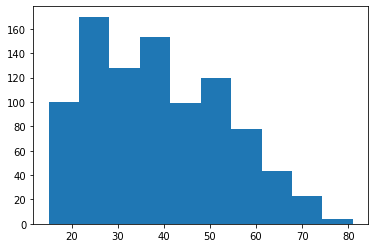

In [198]:
plt.hist(df1['age'])

In [214]:
#X_restricted в тесте Вальда обозначается как нужный нам вектор с выкинутыми незначимыми переменными

X_restricted_1 = X_restricted.drop(['age'], axis = 1)

X_0 = sm.add_constant(X_restricted)
model_full_0 = sm.OLS(y, X_0).fit()

X_1 = sm.add_constant(X_restricted_1[df1['age']<35])
model_1 = sm.OLS(y[df1['age']<35], X_1).fit()

X_2 = sm.add_constant(X_restricted_1[df1['age']>35])
model_2 = sm.OLS(y[df1['age']>35], X_2).fit()

In [215]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cigarettes   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     12.70
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.89e-11
Time:                        21:37:09   Log-Likelihood:                -1357.5
No. Observations:                 398   AIC:                             2727.
Df Residuals:                     392   BIC:                             2751.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2275      1.106     10.150      0.000       9.053      13.402
male           5.8245      0.762      7.646      0.000       4.327       7.322
walk_min       0.0014      0.003      0.499      0.618      -0.004       0.007
sport         -1.4145      0.826     -1.713      0.088      -3.038       0.209
smoke_home     1.5109      0.757      1.996      0.047       0.023       2.999
urban         -0.6298      0.917     -0.687      0.493      -2.432       1.173
==============================================================================
Omnibus:                      118.752   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.382
Skew:                           1.336   Prob(JB):                     2.30e-86
Kurtosis:                       7.080   Cond. No.                         686.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cigarettes   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     17.57
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           4.92e-16
Time:                        21:37:13   Log-Likelihood:                -1754.6
No. Observations:                 500   AIC:                             3521.
Df Residuals:                     494   BIC:                             3546.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5986      1.209     10.418      0.000      10.223      14.975
male           6.1206      0.794      7.712      0.000       4.561       7.680
walk_min       0.0009      0.003      0.294      0.769      -0.005       0.007
sport         -2.2640      0.970     -2.333      0.020      -4.171      -0.357
smoke_home     3.1203      0.751      4.153      0.000       1.644       4.596
urban         -1.7846      0.883     -2.020      0.044      -3.520      -0.049
==============================================================================
Omnibus:                      129.231   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.337
Skew:                           1.207   Prob(JB):                     5.24e-87
Kurtosis:                       6.640   Cond. No.                         691.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
RSS_full = sum(model_full_0.resid**2)
RSS_1 = sum(model_1.resid**2)
RSS_2 = sum(model_2.resid**2)

numerator =  (RSS_full - RSS_1 - RSS_2) / 7
denominator = ( RSS_1 + RSS_2 ) / (918-2*7) 
chow_test = numerator / denominator

p_value = 1 - stats.f.cdf(chow_test, 6, 918-2*6)

In [220]:
print('Chow test stat:', chow_test)
print ('p-value:', p_value)

Chow test stat: 3.045650961385327
p-value: 0.005910891528534079


Маленькое p-value, значит, нулевая гипотеза отвергается, лучше когда две отдельные модели.

Однако интересно, что коэф-т детерминации (объясняющая способность) у этих двух моделей немного ниже, чем у одной общей. 

**Методологические проблемы модели**:  
1) Очень большое кол-во вопросов, формирующих категориальные переменные, и очень мало вопросов в исходном опроснике на конкретные цифры. В результате обилия категориальных переменных и практически отсутствии количественных переменных качество модели снижается.  
  
2) В принципе, кол-во выкуриваемых в день сигарет зависит от очень многих факторов, и все учесть невозможно, так как многие из факторов не поддаются количественному описанию, а также потому, что такое явление как курение - явление очень индивидуальное, и отследить общие "законы" причин курения очень тяжело и требует глубоких знаний психологии человека. Например, в строго экономической области исследования, финансах, практически все переменные количественные и очень взаимосвязанные, в результате чего построение регрессионных моделей там приводит к более качественным и значимым результатам.

# Модель 2. Классификационное дерево

**Деревья классификации** – это метод классификационного анализа, позволяющий предсказывать принадлежность объектов к тому или иному классу в зависимости от соответствующих значений признаков, характеризующих объекты. Относится к непараметрическому методу обучения с учителем.  
Дерево решений имеет структуру блок-схемы. 

In [221]:
df

#delete smoke_cat, cigarettes, alcohol, labour_hours, income, income_cat
#delete null
#dummy

,male,age,edu,walk_min,sport,smoke,smoke_cat,cigarettes,smoke_family,smoke_home,alcohol,labour_hours,income,income_cat,urban,married,children
0,0,22,0,180,0.0,1,1,20,1.0,1.0,1.0,NaN,NaN,3,1,0,1
1,0,22,0,200,1.0,1,1,20,0.0,1.0,1.0,NaN,40000.0,4,1,1,1
2,0,52,1,120,0.0,0,4,0,1.0,1.0,1.0,60.0,80000.0,4,1,0,0
3,0,15,0,120,1.0,0,4,0,0.0,0.0,NaN,NaN,NaN,4,1,0,0
4,0,32,2,0,0.0,1,1,10,0.0,1.0,1.0,40.0,70000.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0,58,1,60,1.0,0,4,0,1.0,1.0,0.0,NaN,20000.0,3,0,1,0
3878,1,24,1,120,1.0,0,3,0,1.0,0.0,1.0,47.0,14000.0,3,0,0,0
3879,0,61,0,30,0.0,0,4,0,1.0,1.0,1.0,NaN,12000.0,2,0,0,1
3880,0,25,2,20,1.0,0,4,0,0.0,0.0,1.0,40.0,30000.0,4,0,1,0


## Классификационное дерево для разделения людей на курящих и некурящих

In [228]:
df2 = df.drop(['smoke_cat', 'cigarettes', 'alcohol', 'labour_hours', 'income', 'income_cat'], axis=1)

In [229]:
df2 = df2.dropna(axis=0)

In [230]:
df2

,male,age,edu,walk_min,sport,smoke,smoke_family,smoke_home,urban,married,children
0,0,22,0,180,0.0,1,1.0,1.0,1,0,1
1,0,22,0,200,1.0,1,0.0,1.0,1,1,1
2,0,52,1,120,0.0,0,1.0,1.0,1,0,0
3,0,15,0,120,1.0,0,0.0,0.0,1,0,0
4,0,32,2,0,0.0,1,0.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3877,0,58,1,60,1.0,0,1.0,1.0,0,1,0
3878,1,24,1,120,1.0,0,1.0,0.0,0,0,0
3879,0,61,0,30,0.0,0,1.0,1.0,0,0,1
3880,0,25,2,20,1.0,0,0.0,0.0,0,1,0


In [231]:
df2 = pd.get_dummies(df2, columns = ['edu'], drop_first=True)

In [235]:
y = df2['smoke'] 
X = df2.drop('smoke',axis=1)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=99, test_size=0.3)

In [237]:
clf = DecisionTreeClassifier()

In [238]:
clf = clf.fit(X_train,y_train)

In [239]:
y_pred = clf.predict(X_test)

In [240]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.752112676056338


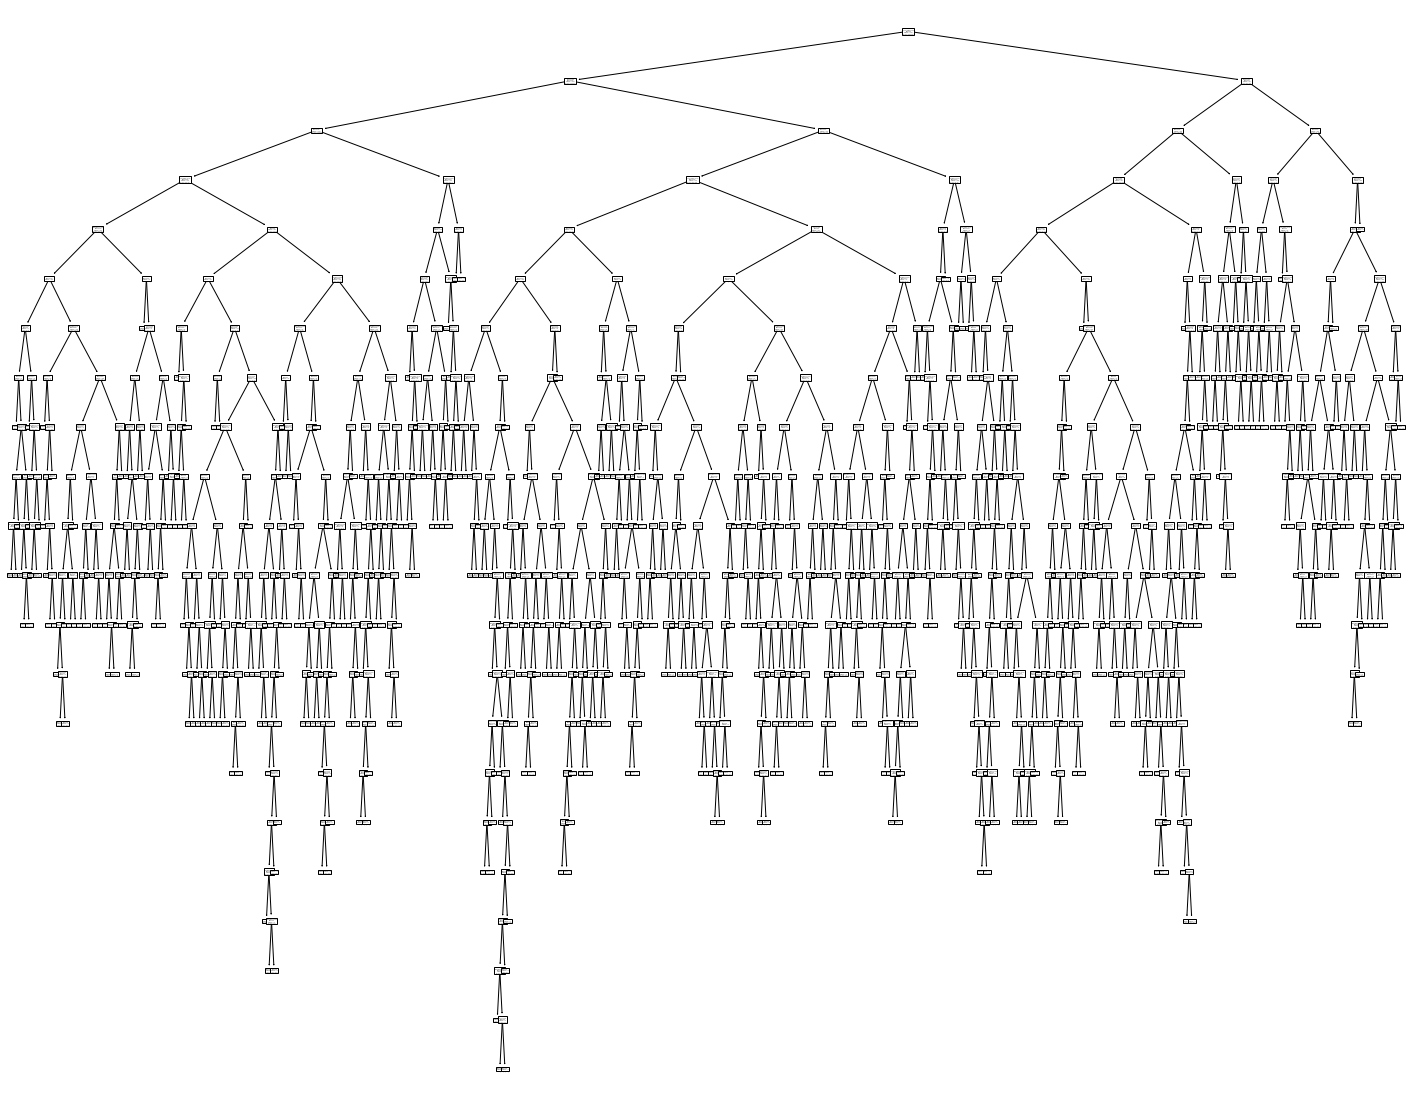

In [241]:
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=X.columns);

Произошло переобучение. Модель очень сильно подстроилась под данные.   
Введем критерии остановки.   
Ограничим глубину, установим минимальное количество наблюдений в листе, максимально количество листов.

In [249]:
clf2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 100, max_leaf_nodes = 1000)
clf2 = clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.8093896713615023


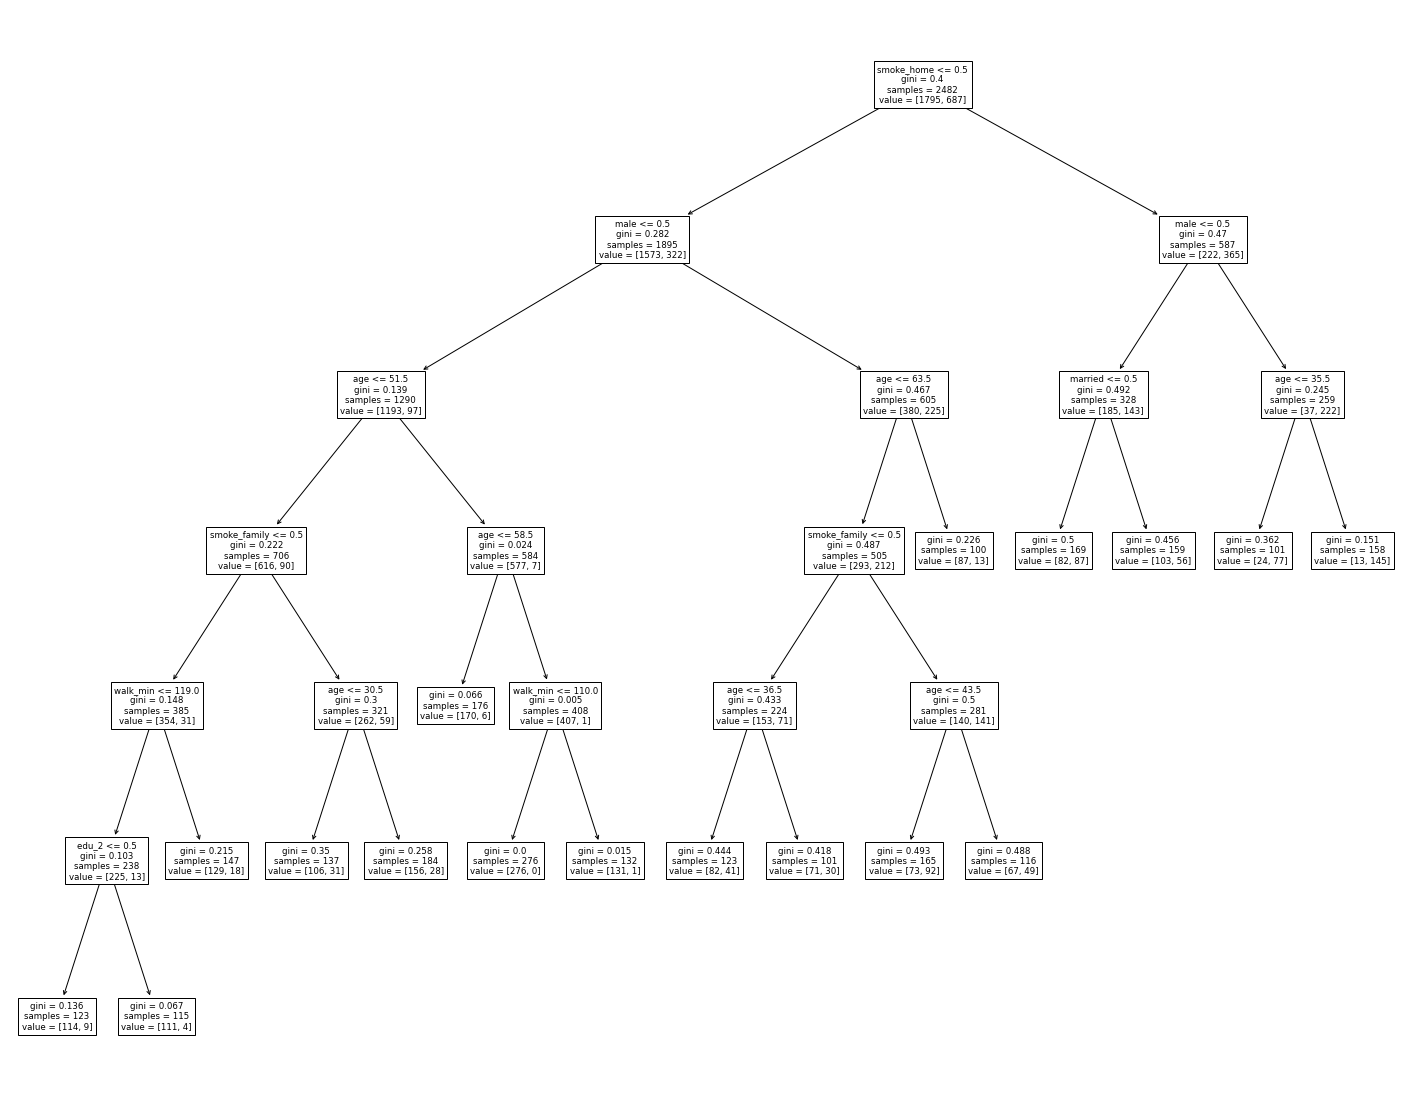

In [250]:
plt.figure(figsize=(25,20))
plot_tree(clf2, feature_names=X.columns)

Отлично, точность предсказания увеличилась, а переобучения не возникло, так как дерево уже не так сильно подстроилась под данные (судя по виду дерева).

**Интерпретация модели**:

В корневом узле (в самом верхнем блоке) мы видим переменную smoke_home.  
В узле задается вопрос с самым большим приростом информации.  
Это значит, что, согласно модели классификационного дерева, наиболее важной для прогнозирования того, курит человек или нет, является то, курят ли в месте, где живет человек.   
Далее по значимости идет пол, далее возраст. 

## Классификационное дерево для разделения людей на пьющих и непьющих

In [251]:
df

,male,age,edu,walk_min,sport,smoke,smoke_cat,cigarettes,smoke_family,smoke_home,alcohol,labour_hours,income,income_cat,urban,married,children
0,0,22,0,180,0.0,1,1,20,1.0,1.0,1.0,NaN,NaN,3,1,0,1
1,0,22,0,200,1.0,1,1,20,0.0,1.0,1.0,NaN,40000.0,4,1,1,1
2,0,52,1,120,0.0,0,4,0,1.0,1.0,1.0,60.0,80000.0,4,1,0,0
3,0,15,0,120,1.0,0,4,0,0.0,0.0,NaN,NaN,NaN,4,1,0,0
4,0,32,2,0,0.0,1,1,10,0.0,1.0,1.0,40.0,70000.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0,58,1,60,1.0,0,4,0,1.0,1.0,0.0,NaN,20000.0,3,0,1,0
3878,1,24,1,120,1.0,0,3,0,1.0,0.0,1.0,47.0,14000.0,3,0,0,0
3879,0,61,0,30,0.0,0,4,0,1.0,1.0,1.0,NaN,12000.0,2,0,0,1
3880,0,25,2,20,1.0,0,4,0,0.0,0.0,1.0,40.0,30000.0,4,0,1,0


In [252]:
df3 = df.drop(['smoke_cat', 'cigarettes', 'smoke', 'labour_hours', 'income', 'income_cat', 'smoke_family', 'smoke_home'], axis=1)

In [253]:
df3 = df3.dropna(axis=0)

In [254]:
df3

,male,age,edu,walk_min,sport,alcohol,urban,married,children
0,0,22,0,180,0.0,1.0,1,0,1
1,0,22,0,200,1.0,1.0,1,1,1
2,0,52,1,120,0.0,1.0,1,0,0
4,0,32,2,0,0.0,1.0,1,0,0
5,0,22,2,120,0.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
3877,0,58,1,60,1.0,0.0,0,1,0
3878,1,24,1,120,1.0,1.0,0,0,0
3879,0,61,0,30,0.0,1.0,0,0,1
3880,0,25,2,20,1.0,1.0,0,1,0


In [255]:
df3 = pd.get_dummies(df3, columns = ['edu'], drop_first=True)

In [256]:
y = df3['alcohol'] 
X = df3.drop('alcohol',axis=1)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=99, test_size=0.3)

In [262]:
clf3 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 100, max_leaf_nodes = 1000)
clf3 = clf3.fit(X_train,y_train)
y_pred3 = clf3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))

Accuracy: 0.6530054644808743


[Text(815.625, 1009.5428571428572, 'age <= 53.5\ngini = 0.487\nsamples = 2562\nvalue = [1072, 1490]'),
 Text(438.75, 854.2285714285715, 'age <= 18.5\ngini = 0.441\nsamples = 1639\nvalue = [538, 1101]'),
 Text(393.75, 698.9142857142858, 'gini = 0.487\nsamples = 112\nvalue = [65, 47]'),
 Text(483.75, 698.9142857142858, 'male <= 0.5\ngini = 0.428\nsamples = 1527\nvalue = [473, 1054]'),
 Text(292.5, 543.6, 'sport <= 0.5\ngini = 0.455\nsamples = 956\nvalue = [335, 621]'),
 Text(180.0, 388.28571428571433, 'married <= 0.5\ngini = 0.444\nsamples = 693\nvalue = [231, 462]'),
 Text(90.0, 232.97142857142865, 'walk_min <= 115.0\ngini = 0.396\nsamples = 298\nvalue = [81, 217]'),
 Text(45.0, 77.65714285714284, 'gini = 0.423\nsamples = 191\nvalue = [58, 133]'),
 Text(135.0, 77.65714285714284, 'gini = 0.337\nsamples = 107\nvalue = [23, 84]'),
 Text(270.0, 232.97142857142865, 'age <= 33.5\ngini = 0.471\nsamples = 395\nvalue = [150, 245]'),
 Text(225.0, 77.65714285714284, 'gini = 0.495\nsamples = 167\nv

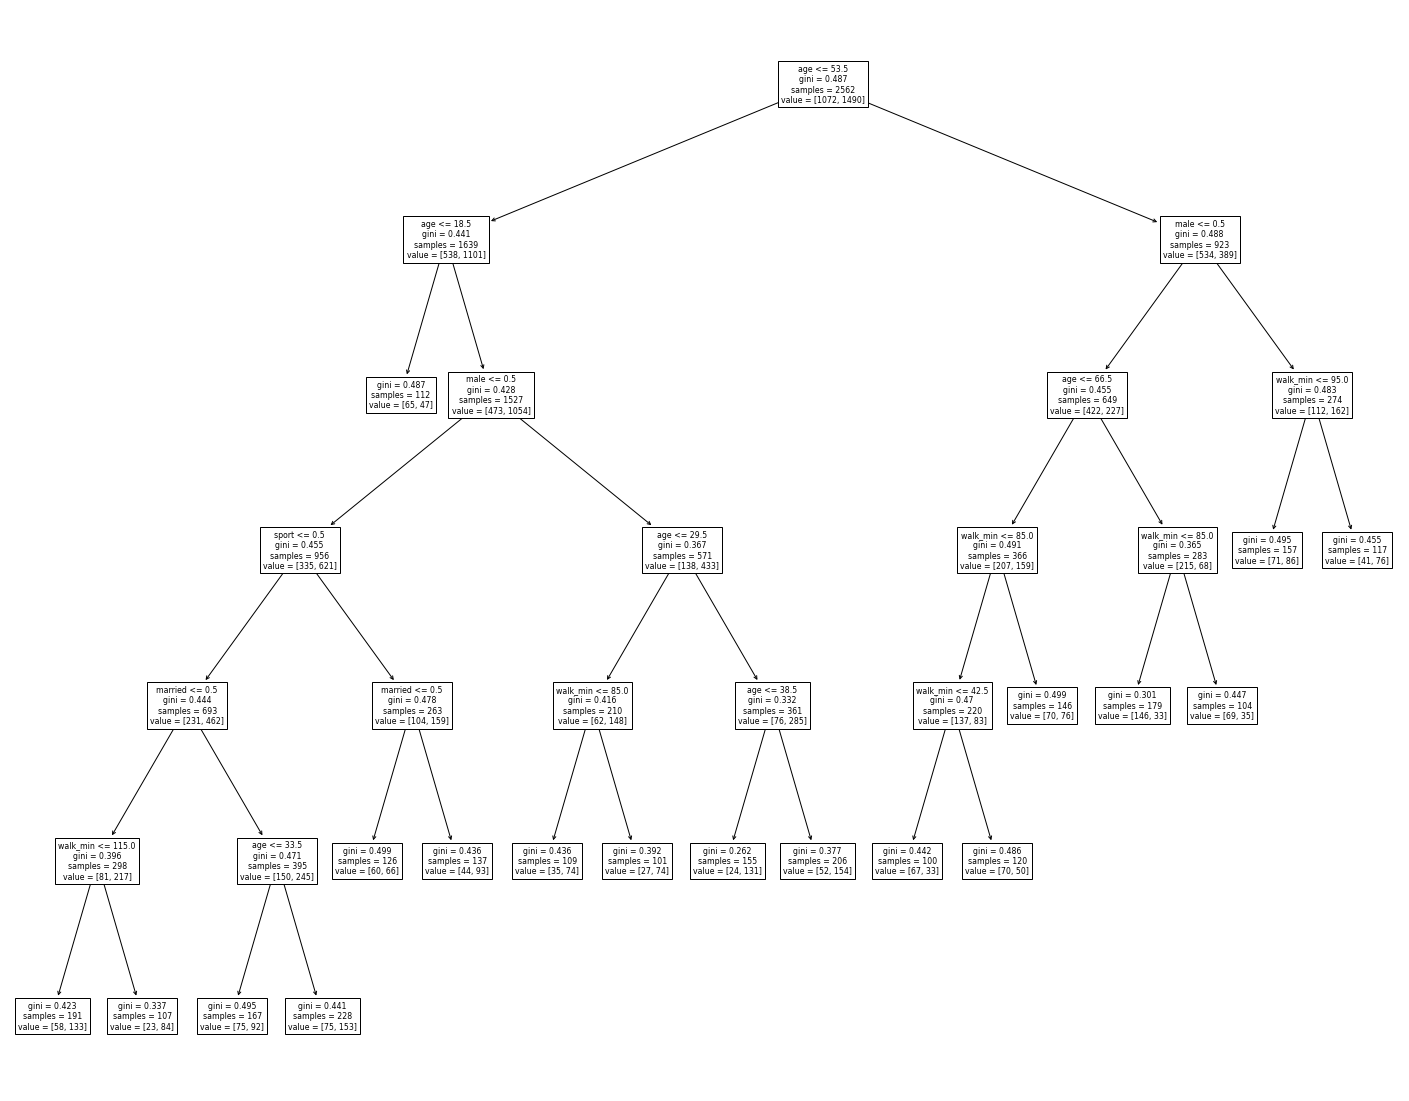

In [263]:
plt.figure(figsize=(25,20))
plot_tree(clf3, feature_names=X.columns)

Точность предсказания в модели с алкоголем оказалась ниже, чем с курением, так как:
   
**1)** В модели с курением у нас были дополнительные переменные, касающиеся того, курили ли родители, курят ли там, где Вы живете, а для алкоголя таких переменных в исходном опроснике не было (пили ли родители, пьют ли там, где вы сейчас живете) 
  
**2)** Алкоголь - намного более распространенная вредная привычка, чем курение, поэтому отследить факторы, которые способствуют тому, что человек не пьет, тяжелее, так как эти случаи еще более индивидуальные и не поддающиеся описанию с помощью каких-то закономерностей, чем в случае с курением.

**Интерпретация модели**:

В корневом узле (в самом верхнем блоке) мы видим переменную age.  
В узле задается вопрос с самым большим приростом информации.  
Это значит, что, согласно модели классификационного дерева, наиболее важной для прогнозирования того, пьет человек или нет,  является возраст человека.   
Далее по значимости идет пол. 